## HuReTEx Main Notebook 0.01 (2025.11.05) - MNIST Dataset

#### Imports

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import importlib
import ipynb

2025-11-05 17:06:19.398888: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-05 17:06:19.398959: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-11-05 17:06:19.613776: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-05 17:06:20.110874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-05 17:06:23.828074: W tensorflow/compiler/tf2

#### External Notebooks

In [2]:
from ipynb.fs.full.HuReTEx_DLS_0_01_MNIST import ConvolutionalSimpleMNIST
importlib.reload(ipynb.fs.full.HuReTEx_DLS_0_01_MNIST)

<module 'ipynb.fs.full.HuReTEx_DLS_0_01_MNIST' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_DLS_0_01_MNIST.ipynb)>

In [3]:
from ipynb.fs.full.HuReTEx_RSFG_0_01 import get_rsfg_df, get_rsfg_layers
importlib.reload(ipynb.fs.full.HuReTEx_RSFG_0_01)

<module 'ipynb.fs.full.HuReTEx_RSFG_0_01' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_RSFG_0_01.ipynb)>

In [19]:
from ipynb.fs.full.HuReTEx_PV_0_02 import generate_path_visualisation
importlib.reload(ipynb.fs.full.HuReTEx_PV_0_02)

<module 'ipynb.fs.full.HuReTEx_PV_0_02' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_PV_0_02.ipynb)>

In [5]:
from ipynb.fs.full.HuReTEx_GA_0_02 import get_best_confident_path
importlib.reload(ipynb.fs.full.HuReTEx_GA_0_02)

<module 'ipynb.fs.full.HuReTEx_GA_0_02' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_GA_0_02.ipynb)>

In [6]:
from ipynb.fs.full.HuReTEx_PCA_0_01 import perform_pca
importlib.reload(ipynb.fs.full.HuReTEx_PCA_0_01)

<module 'ipynb.fs.full.HuReTEx_PCA_0_01' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_PCA_0_01.ipynb)>

In [7]:
from ipynb.fs.full.HuReTEx_IFSE_0_01 import greatest_solution, lowest_solution, implication_TP, Lukasiewicz
importlib.reload(ipynb.fs.full.HuReTEx_IFSE_0_01)

<module 'ipynb.fs.full.HuReTEx_IFSE_0_01' (/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_IFSE_0_01.ipynb)>

#### Deep Learning System - Unreadable Model

In [8]:
output_dir = './Results_MNIST'

In [9]:
dls = ConvolutionalSimpleMNIST()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 4)         40        
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 4)         148       
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 256)               590080    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 592838 (2.26 MB)
Trainable params: 592838 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-11-05 17:06:40.894037: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-11-05 17:06:43.777880: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [10]:
dls.train_model()

Epoch 1/20
2984/3000 [============================>.] - ETA: 0s - loss: 0.1803 - accuracy: 0.9454
Epoch 1: val_accuracy improved from -inf to 0.97150, saving model to best_model.keras
3000/3000 [==============================] - 10s 3ms/step - loss: 0.1801 - accuracy: 0.9455 - val_loss: 0.0958 - val_accuracy: 0.9715
Epoch 2/20
2998/3000 [============================>.] - ETA: 0s - loss: 0.0694 - accuracy: 0.9797
Epoch 2: val_accuracy improved from 0.97150 to 0.97858, saving model to best_model.keras
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0694 - accuracy: 0.9797 - val_loss: 0.0792 - val_accuracy: 0.9786
Epoch 3/20
2999/3000 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9856
Epoch 3: val_accuracy improved from 0.97858 to 0.98008, saving model to best_model.keras
3000/3000 [==============================] - 10s 3ms/step - loss: 0.0480 - accuracy: 0.9855 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 4/20
2985/3000 [==================

#### Sequential Information System (SIS)

In [11]:
dls.calculate_activations()
dls.calculate_artifact_clusters()

1500/1500 [==============================] - 3s 2ms/step
filter: 0
filter: 1
filter: 2
filter: 3
filter: 0
filter: 1
filter: 2
filter: 3
1500/1500 [==============================] - 2s 2ms/step


In [12]:
filters_conv_1 = list(range(len(dls.filter_names_conv_1)))
print(filters_conv_1)
filters_conv_2 = list(range(len(dls.filter_names_conv_2)))
print(filters_conv_2)

[0, 1, 2, 3]
[0, 1, 2, 3]


#### Sequential Information System (SIS)

In [13]:
n_classes = 10

sis = dls.get_sequential_information_system()

print(sis)

         conv1    conv2  dense1  output
0      1_3_1_1  7_0_8_8       3       2
1      2_3_1_1  7_0_0_4       3       2
2      0_3_5_1  7_0_0_8       3       2
3      0_1_5_7  0_4_2_3       6       4
4      7_5_0_1  9_0_5_6       2       5
...        ...      ...     ...     ...
47995  9_0_0_2  6_0_1_5       8       5
47996  9_0_0_1  6_1_1_9       5       8
47997  1_0_6_1  6_0_8_8       8       5
47998  1_0_6_2  6_0_8_5       8       5
47999  8_5_3_1  9_0_9_5       2       3

[48000 rows x 4 columns]


#### Rough Set Flow Graph (RSFG) - Readable Twin

In [14]:
rsfg = get_rsfg_df(sis)
print(rsfg)

      level           relation support certainty  coverage  strength  \
0      0<>1  1_3_1_1-->7_0_8_8      17  0.057239  0.298246  0.000354   
1      0<>1  2_3_1_1-->7_0_0_4     168  0.158341  0.200717  0.003500   
2      0<>1  0_3_5_1-->7_0_0_8      38  0.655172  0.019618  0.000792   
3      0<>1  0_1_5_7-->0_4_2_3      44  0.144262  0.082243  0.000917   
4      0<>1  7_5_0_1-->9_0_5_6     108  0.057416  0.565445  0.002250   
...     ...                ...     ...       ...       ...       ...   
11313  2<>3              9-->2       2  0.000811  0.000420  0.000042   
11314  2<>3              1-->3       2  0.000448  0.000408  0.000042   
11315  2<>3              8-->6       2  0.000711  0.000422  0.000042   
11316  2<>3              6-->3       1  0.000211  0.000204  0.000021   
11317  2<>3              1-->2       1  0.000224  0.000210  0.000021   

       confidence  
0        0.096045  
1        0.177028  
2        0.038095  
3        0.104762  
4        0.104247  
...           .

In [15]:
rsfg_layers, node_dicts = get_rsfg_layers(rsfg)
print(rsfg_layers)
print(node_dicts)

[      source_id  target_id   source   target  confidence
0             0          0  1_3_1_1  7_0_8_8    0.096045
1             1          1  2_3_1_1  7_0_0_4    0.177028
2             2          2  0_3_5_1  7_0_0_8    0.038095
3             3          3  0_1_5_7  0_4_2_3    0.104762
4             4          4  7_5_0_1  9_0_5_6    0.104247
...         ...        ...      ...      ...         ...
8349        839       1845  8_0_9_9  1_3_5_8    0.285715
8350        620        132  0_1_0_7  6_0_5_9    0.133333
8351         33        410  0_1_2_8  0_7_5_3    0.028571
8352         32        700  9_0_0_2  6_0_8_1    0.002193
8353         80        492  2_6_9_1  3_0_1_2    0.074074

[8354 rows x 5 columns],        source_id  target_id   source target  confidence
8354           0          0  7_0_8_8      3    0.020020
8355           1          0  7_0_0_4      3    0.294977
8356           2          0  7_0_0_8      3    0.566199
8357           3          1  0_4_2_3      6    0.163854
8358     

/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_RSFG_0_01.ipynb:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "            \n",
/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_RSFG_0_01.ipynb:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "            \n",
/var/srv/183110/Moje/Nauka/HuReTEx/HuRuTEx_github/HuReTEx_RSFG_0_01.ipynb:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

#### Best Paths (BPs)

 The best solution found:                                                                           
 [1. 2. 0. 0.]

 Objective function:
 -0.1926134173840116


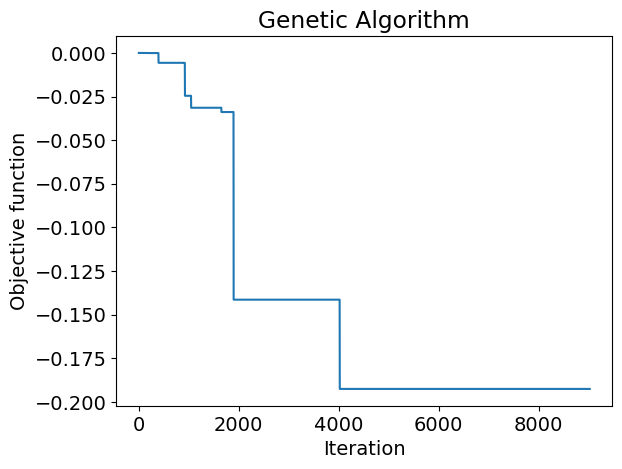


 The best solution found:                                                                           
 [53. 59.  1.  1.]

 Objective function:
 -0.07620385860087177


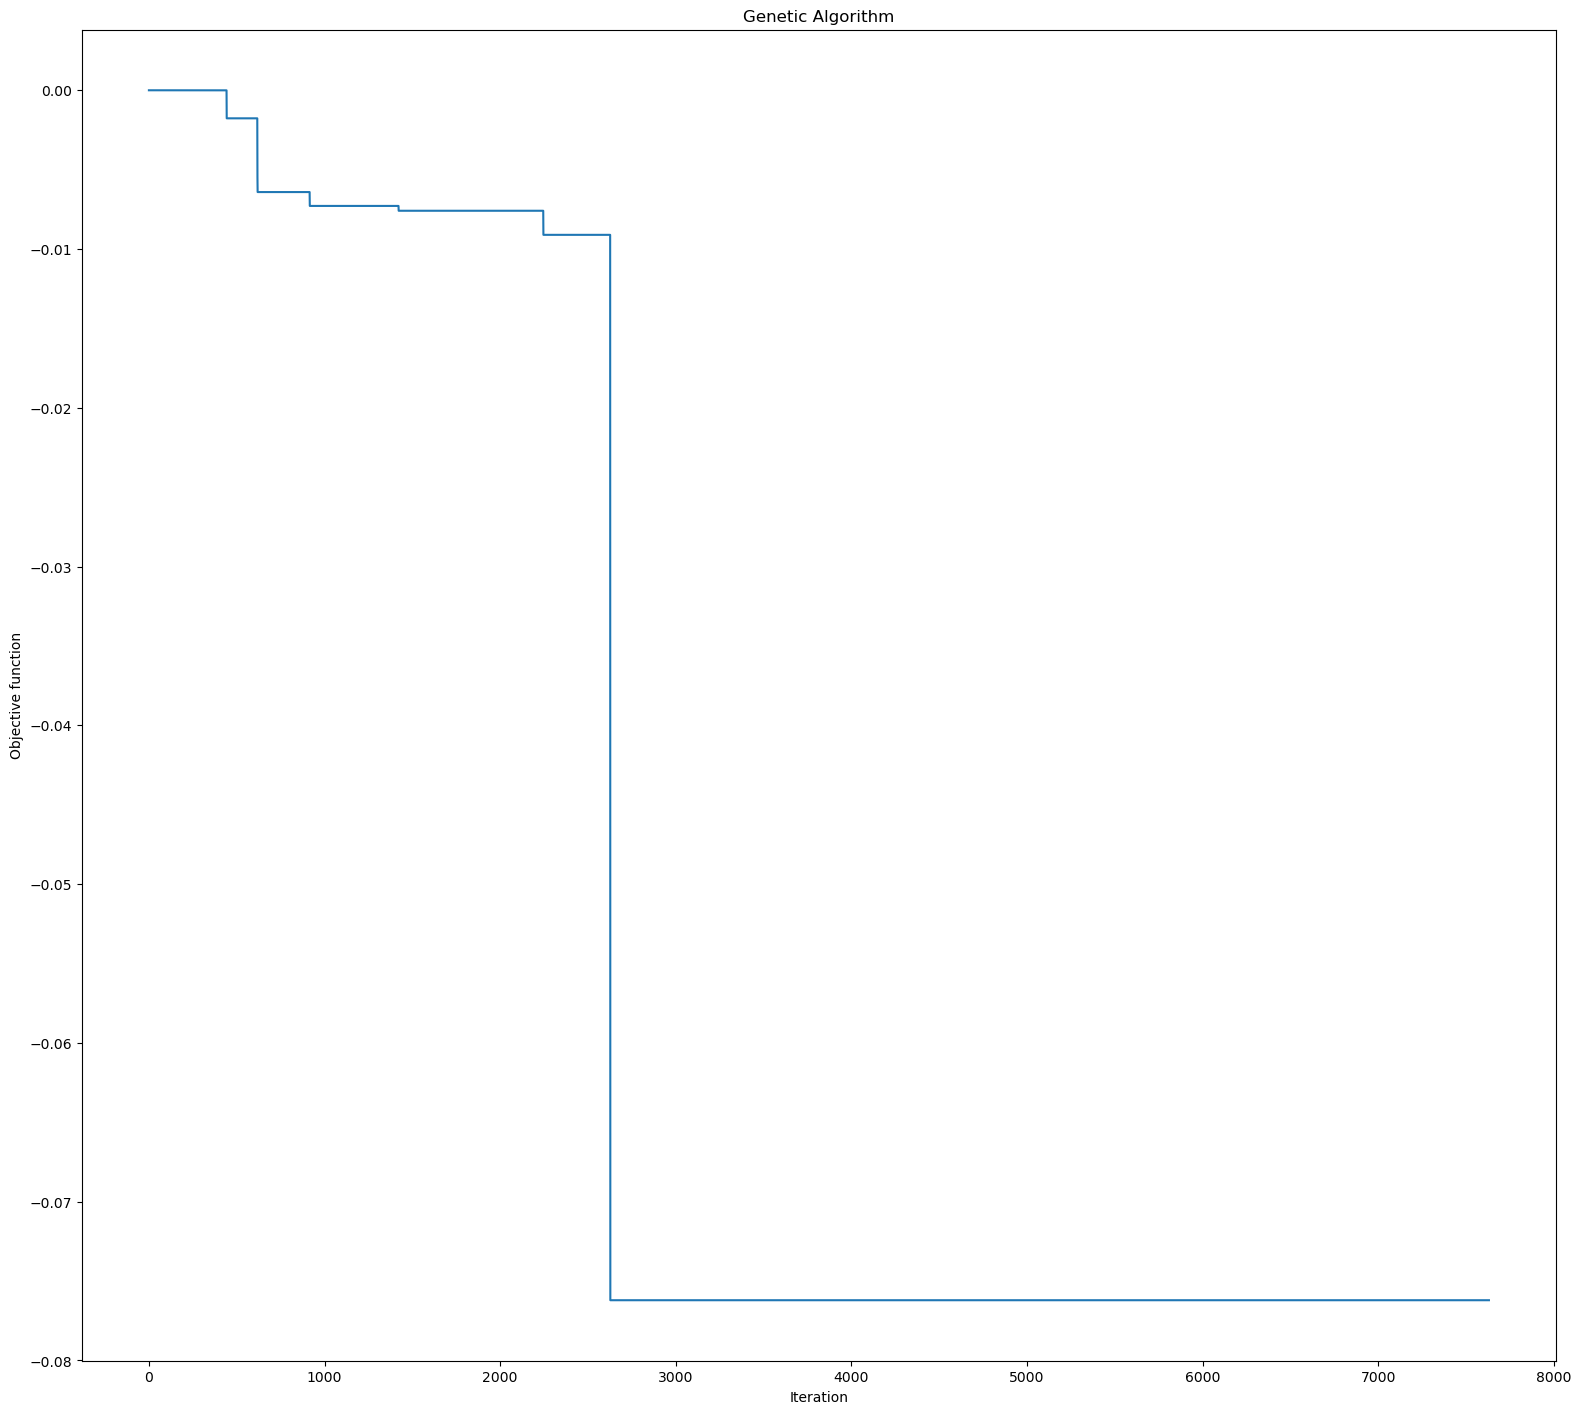


 The best solution found:                                                                           
 [397. 164.   5.   2.]

 Objective function:
 -0.001043956066036639


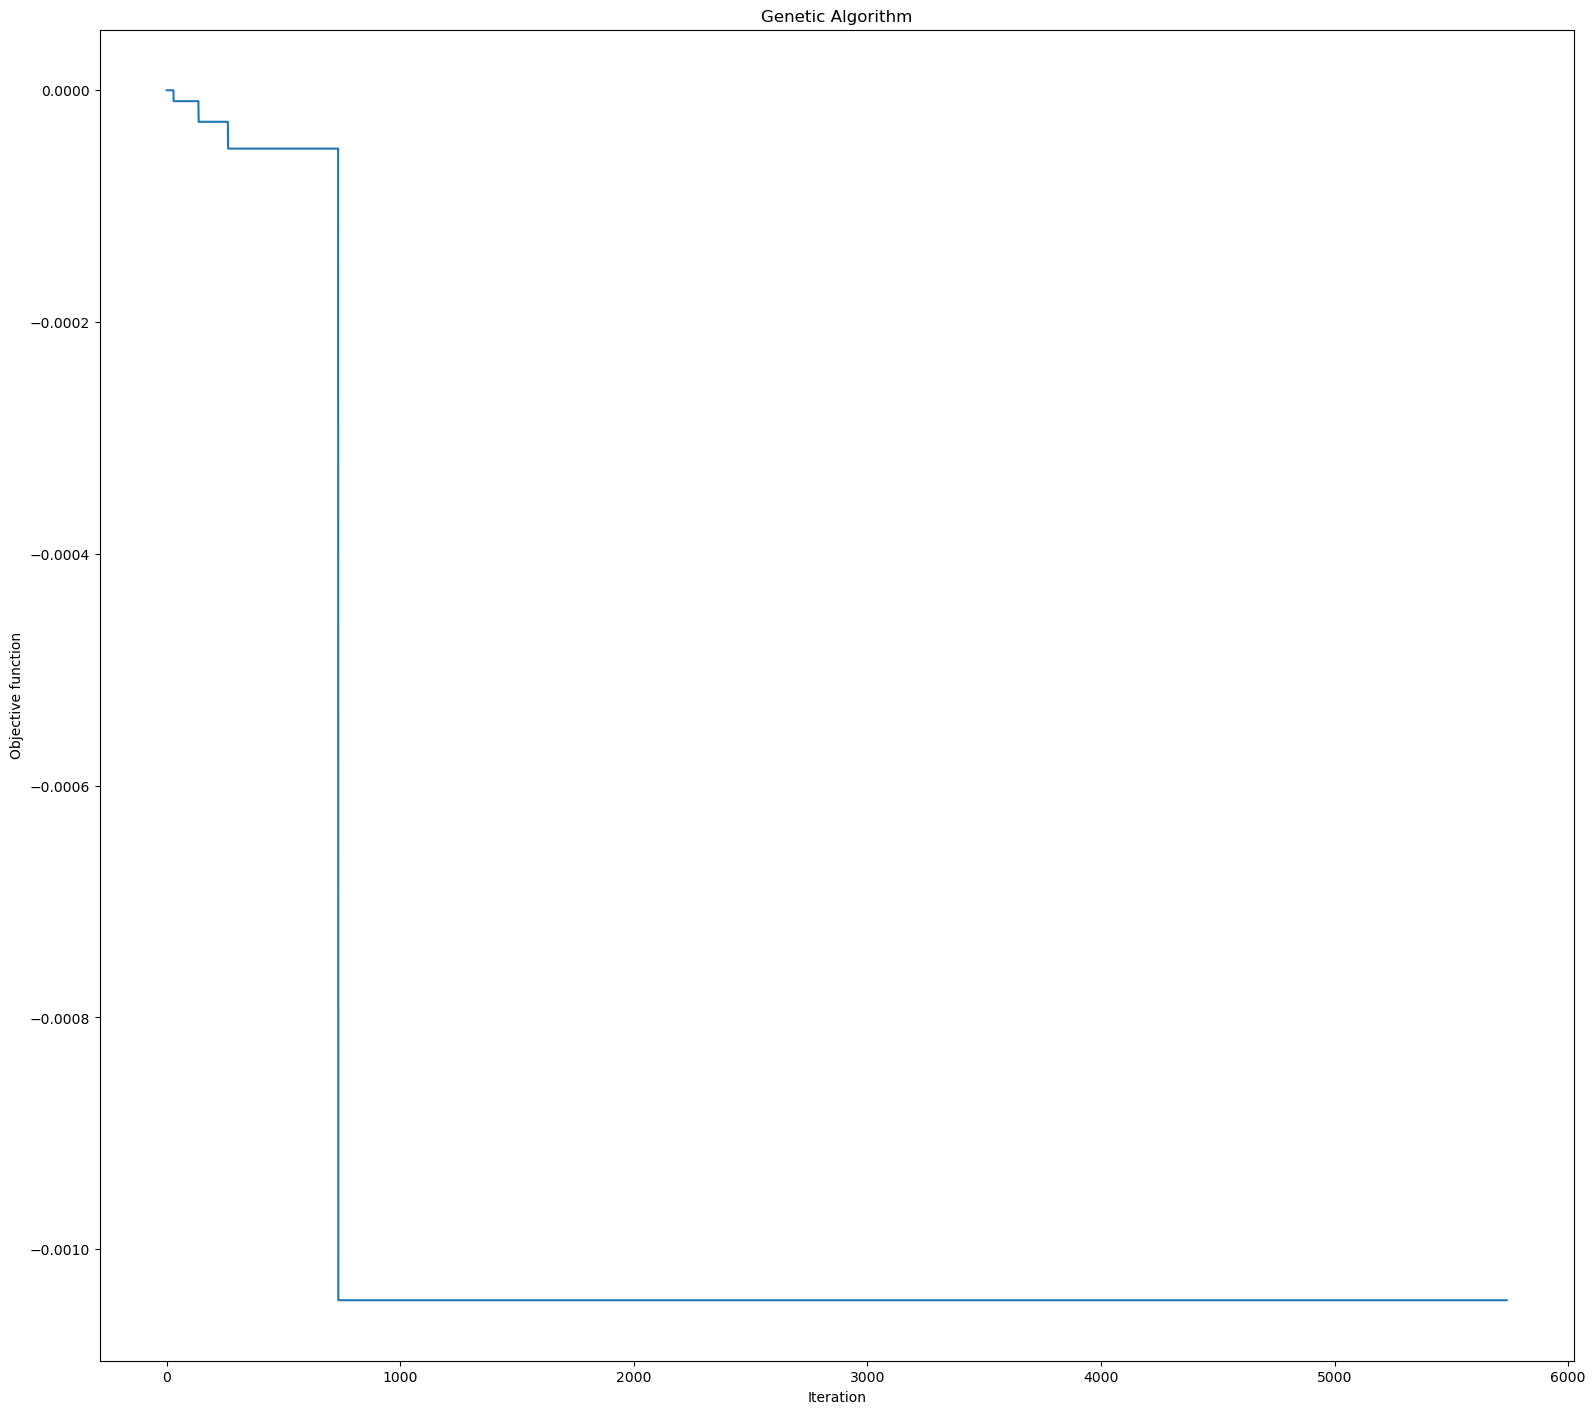


 The best solution found:                                                                           
 [31. 11.  3.  3.]

 Objective function:
 -0.004642262181976087


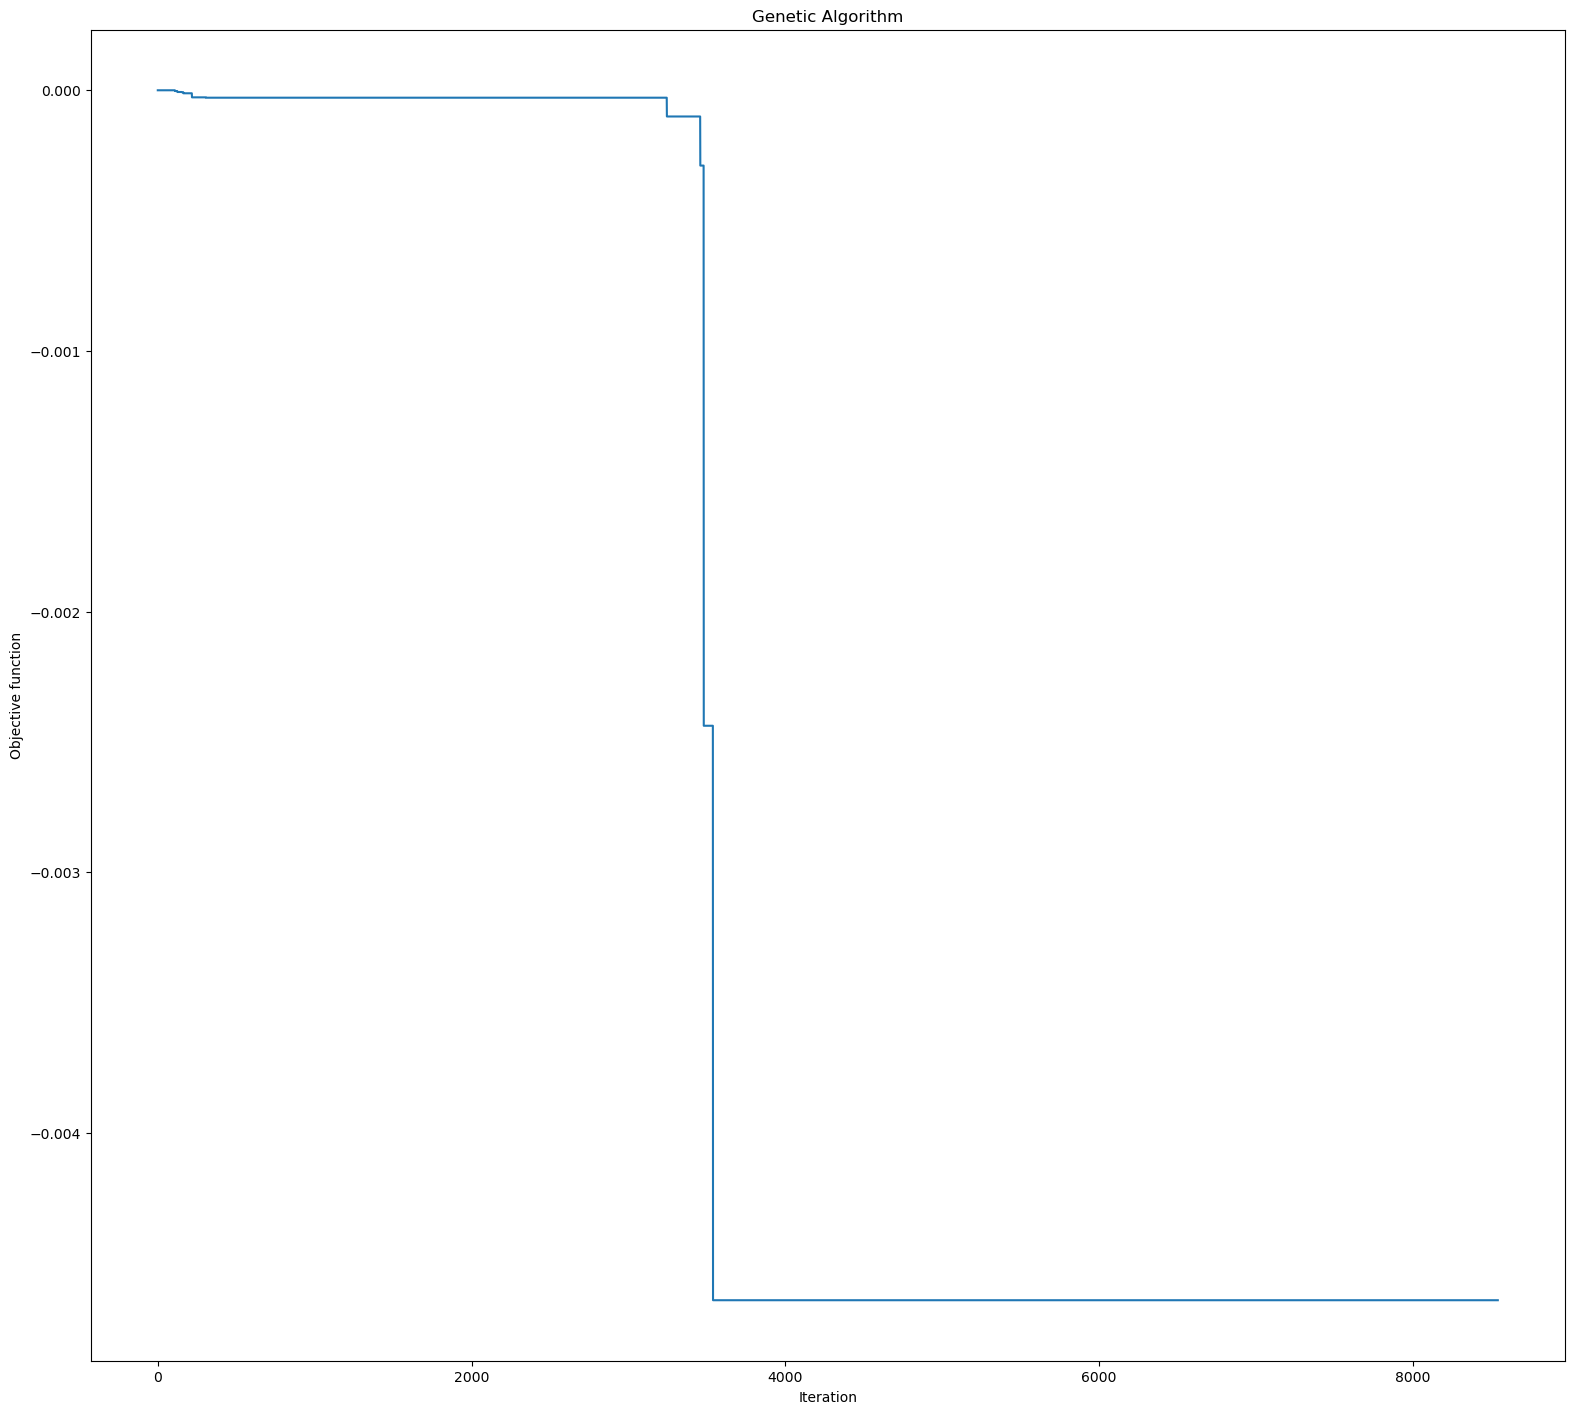


 The best solution found:                                                                           
 [661. 913.   4.   4.]

 Objective function:
 -0.000291729115188434


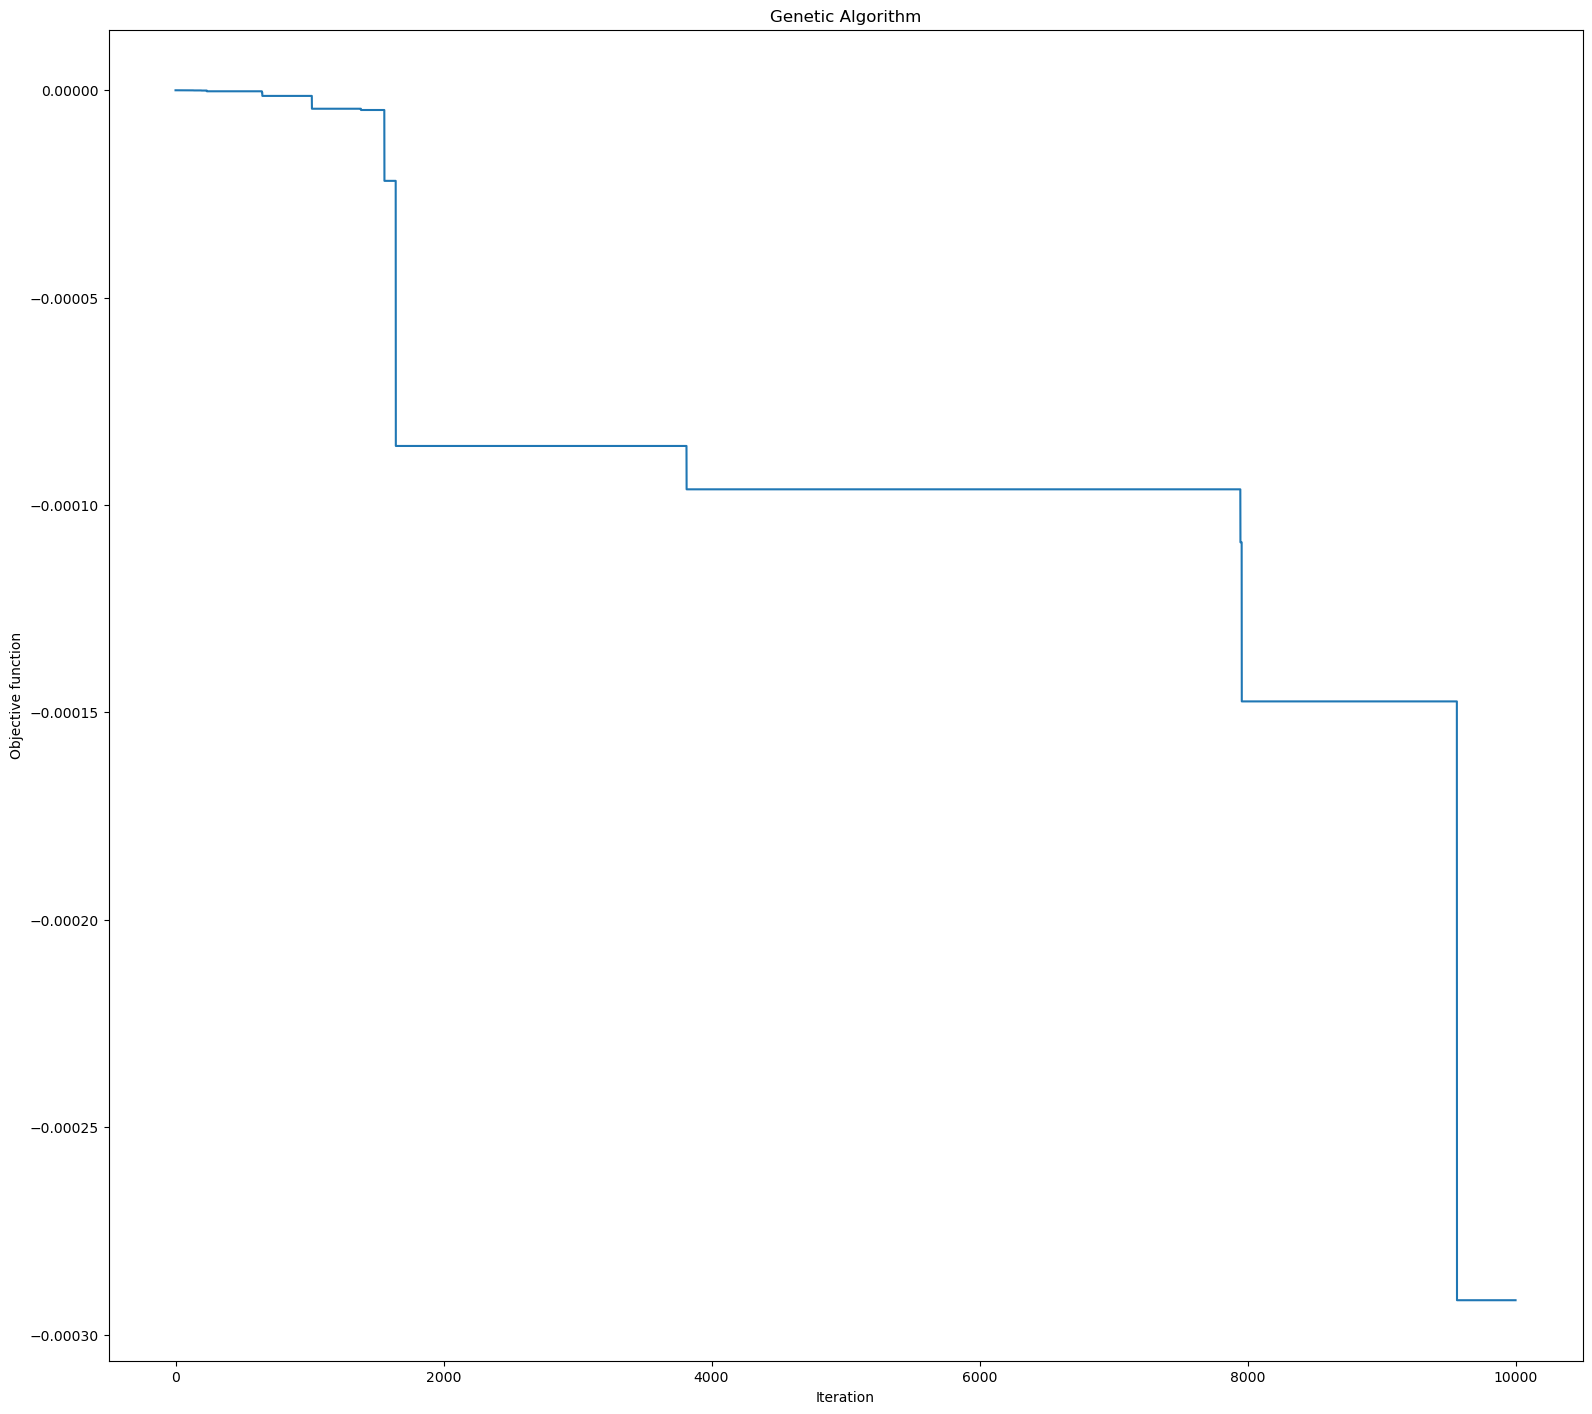

 The best solution found:                                                                           
 [137.  89.   6.   5.]

 Objective function:
 -0.033134787577291845


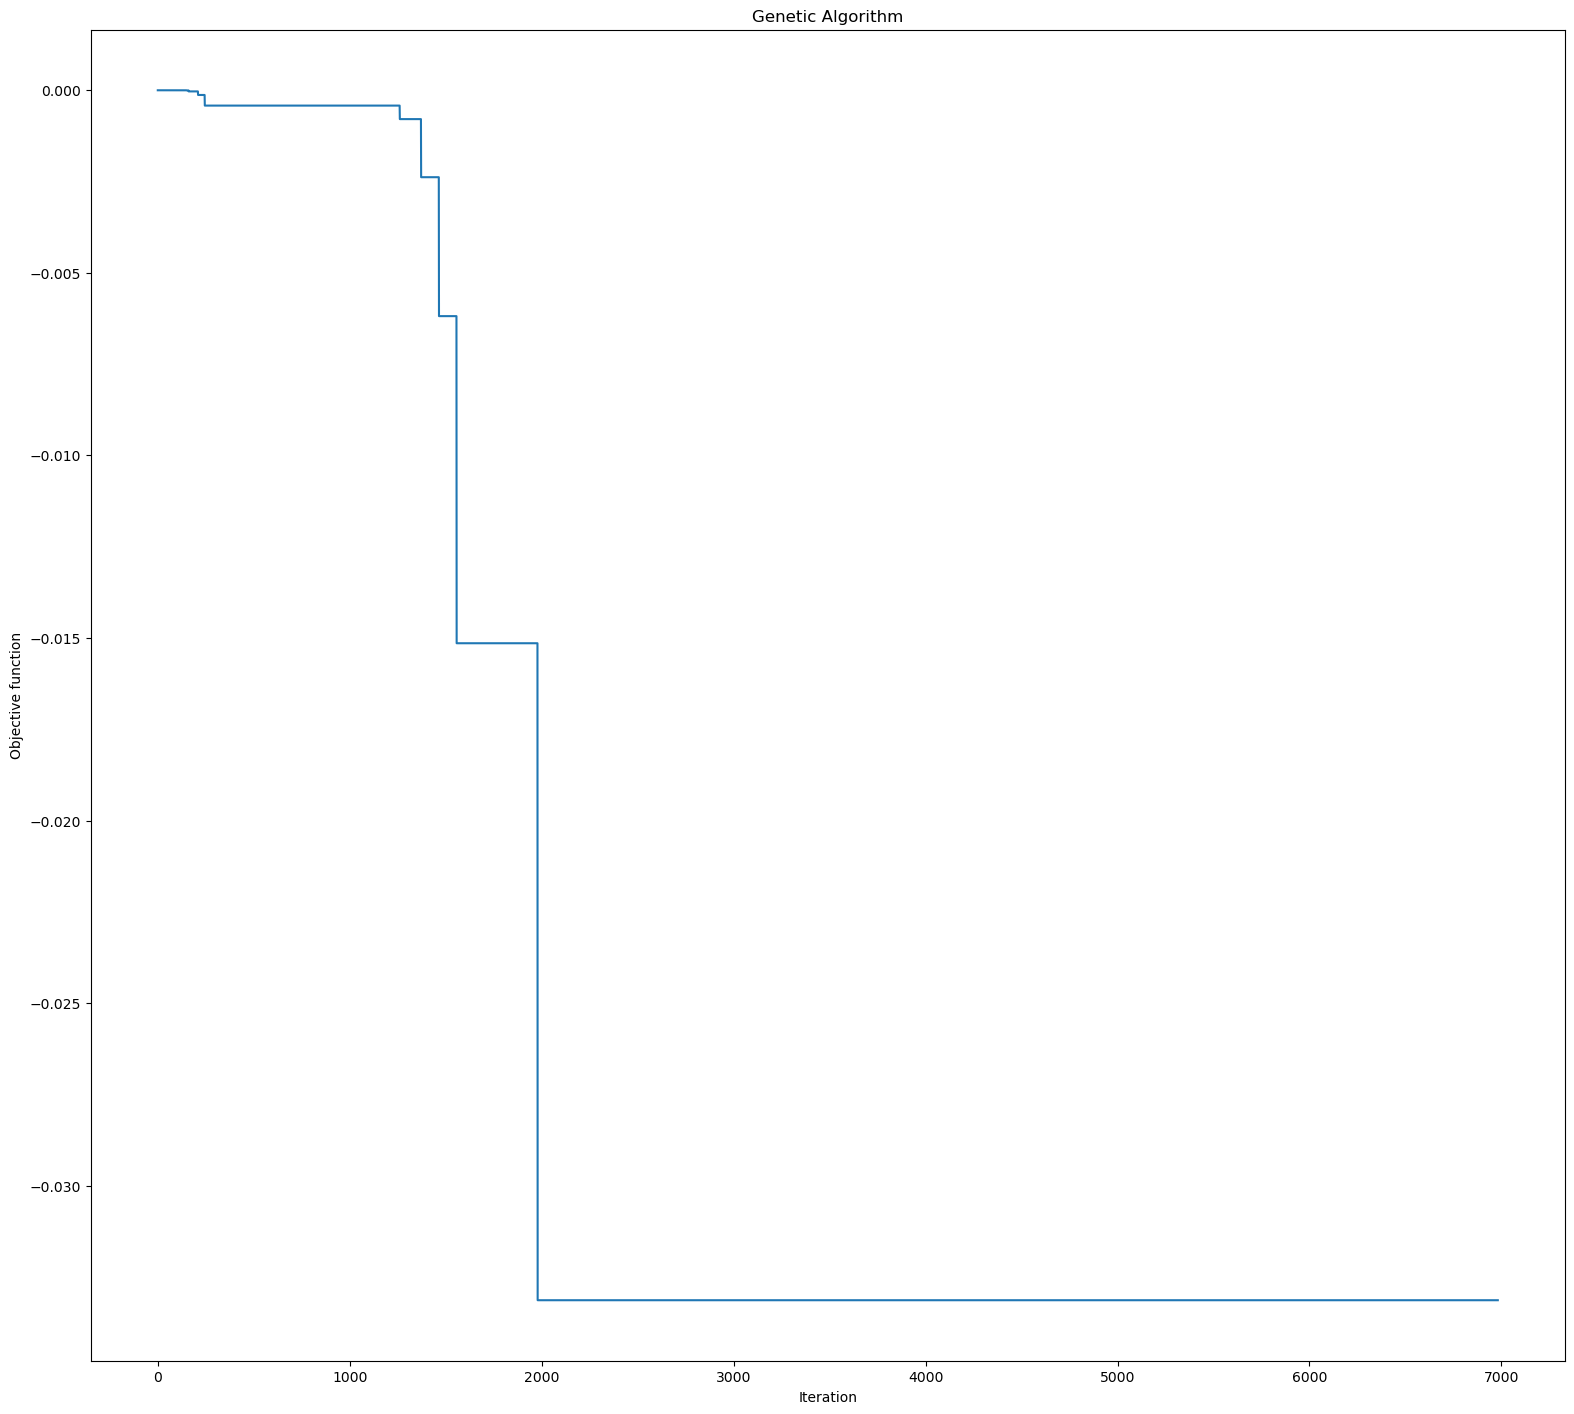


 The best solution found:                                                                           
 [44. 14.  2.  6.]

 Objective function:
 -0.03239720838564678


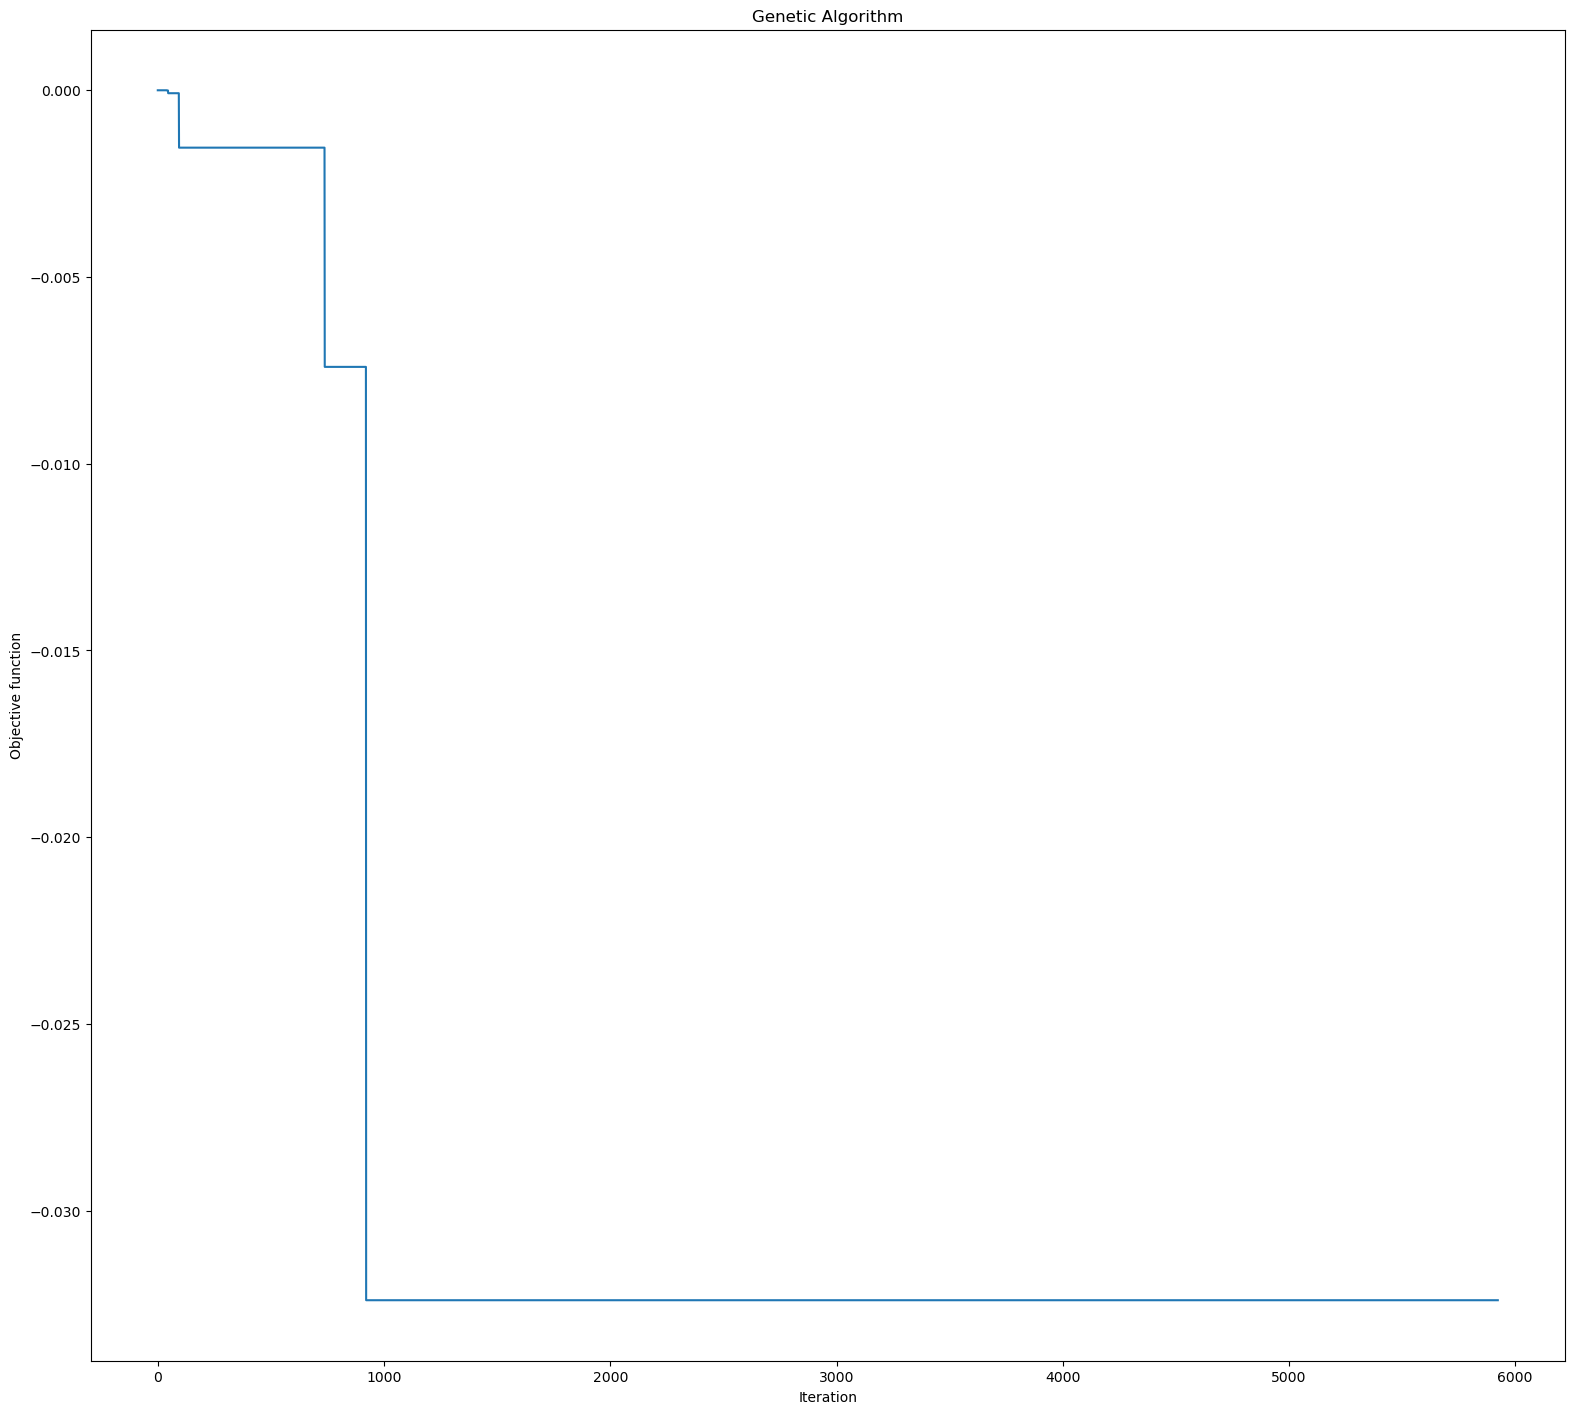


 The best solution found:                                                                           
 [47. 37.  8.  7.]

 Objective function:
 -0.0758816010852538


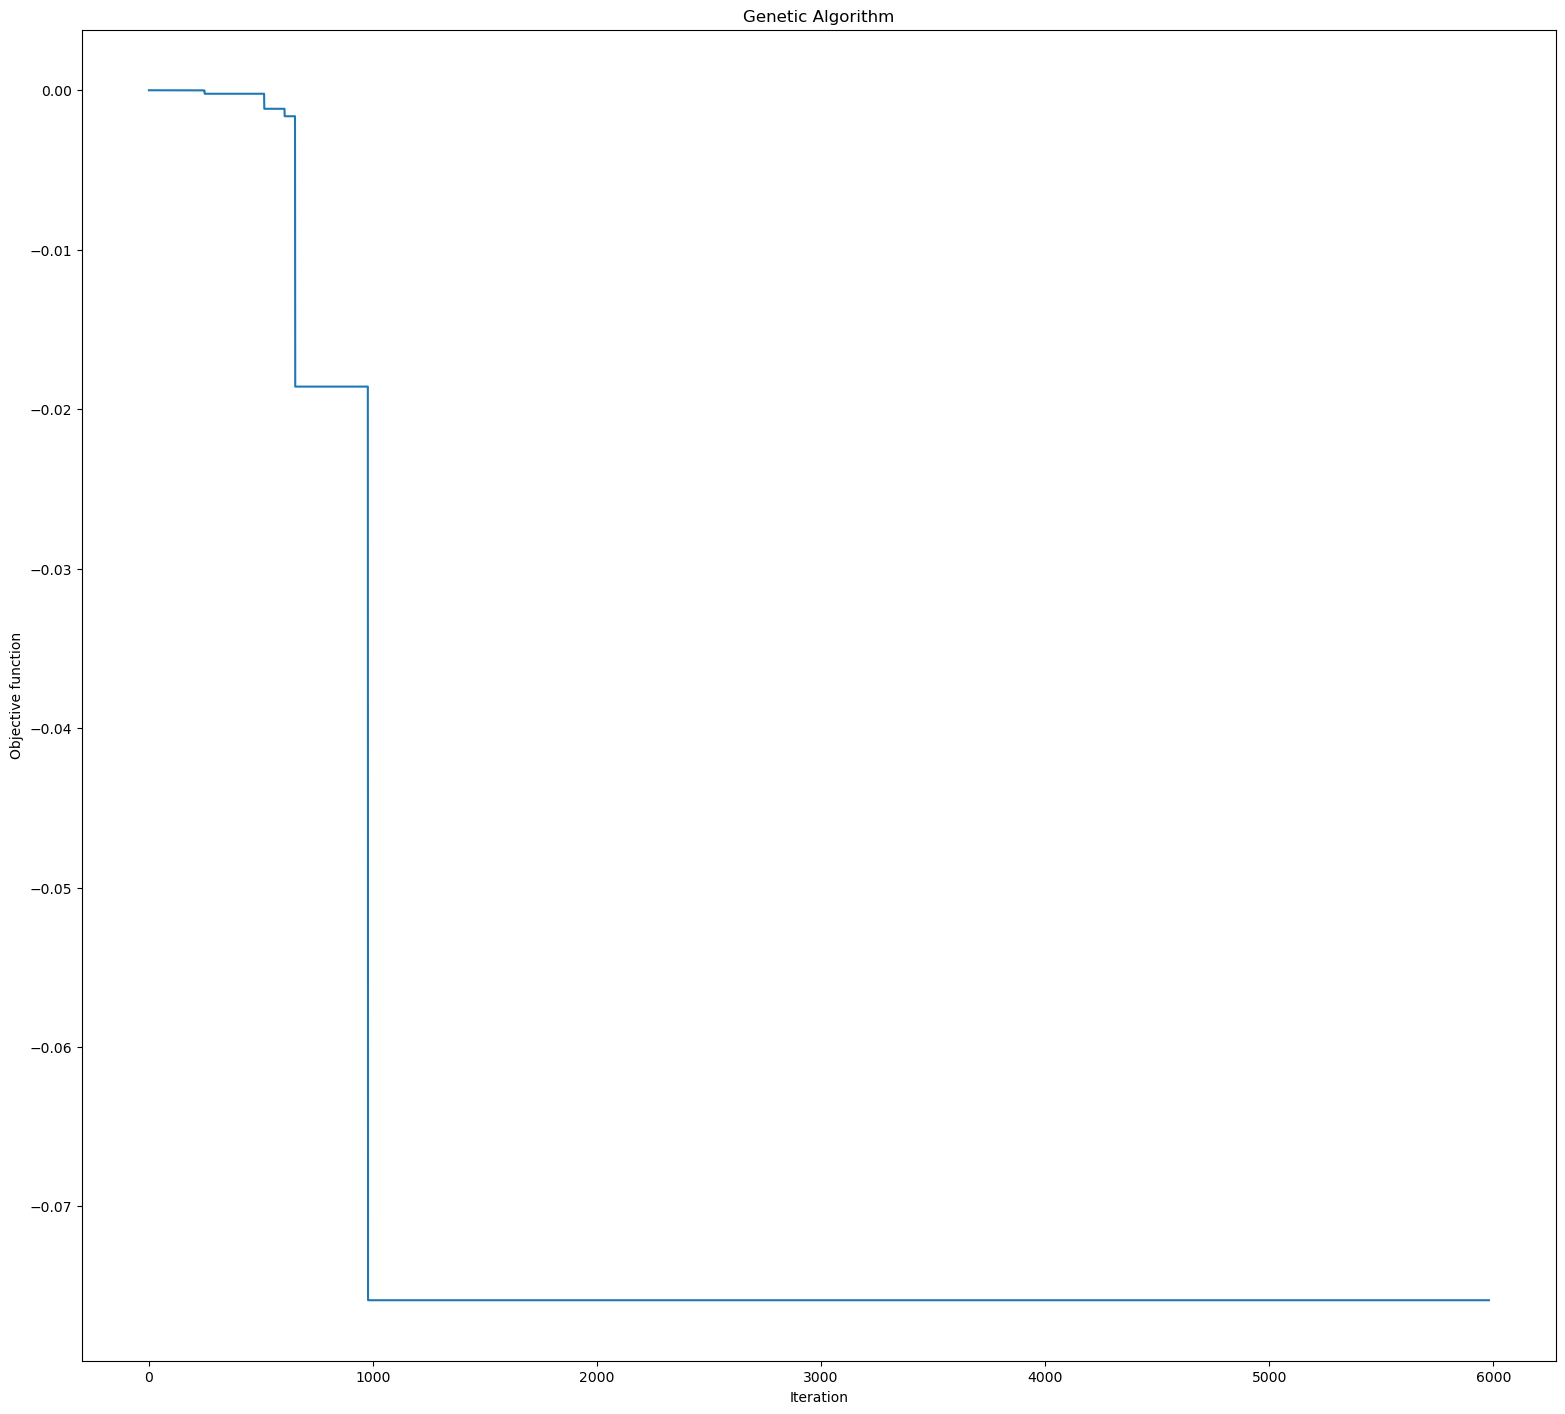


 The best solution found:                                                                           
 [20. 24.  3.  8.]

 Objective function:
 -0.02235015959997303


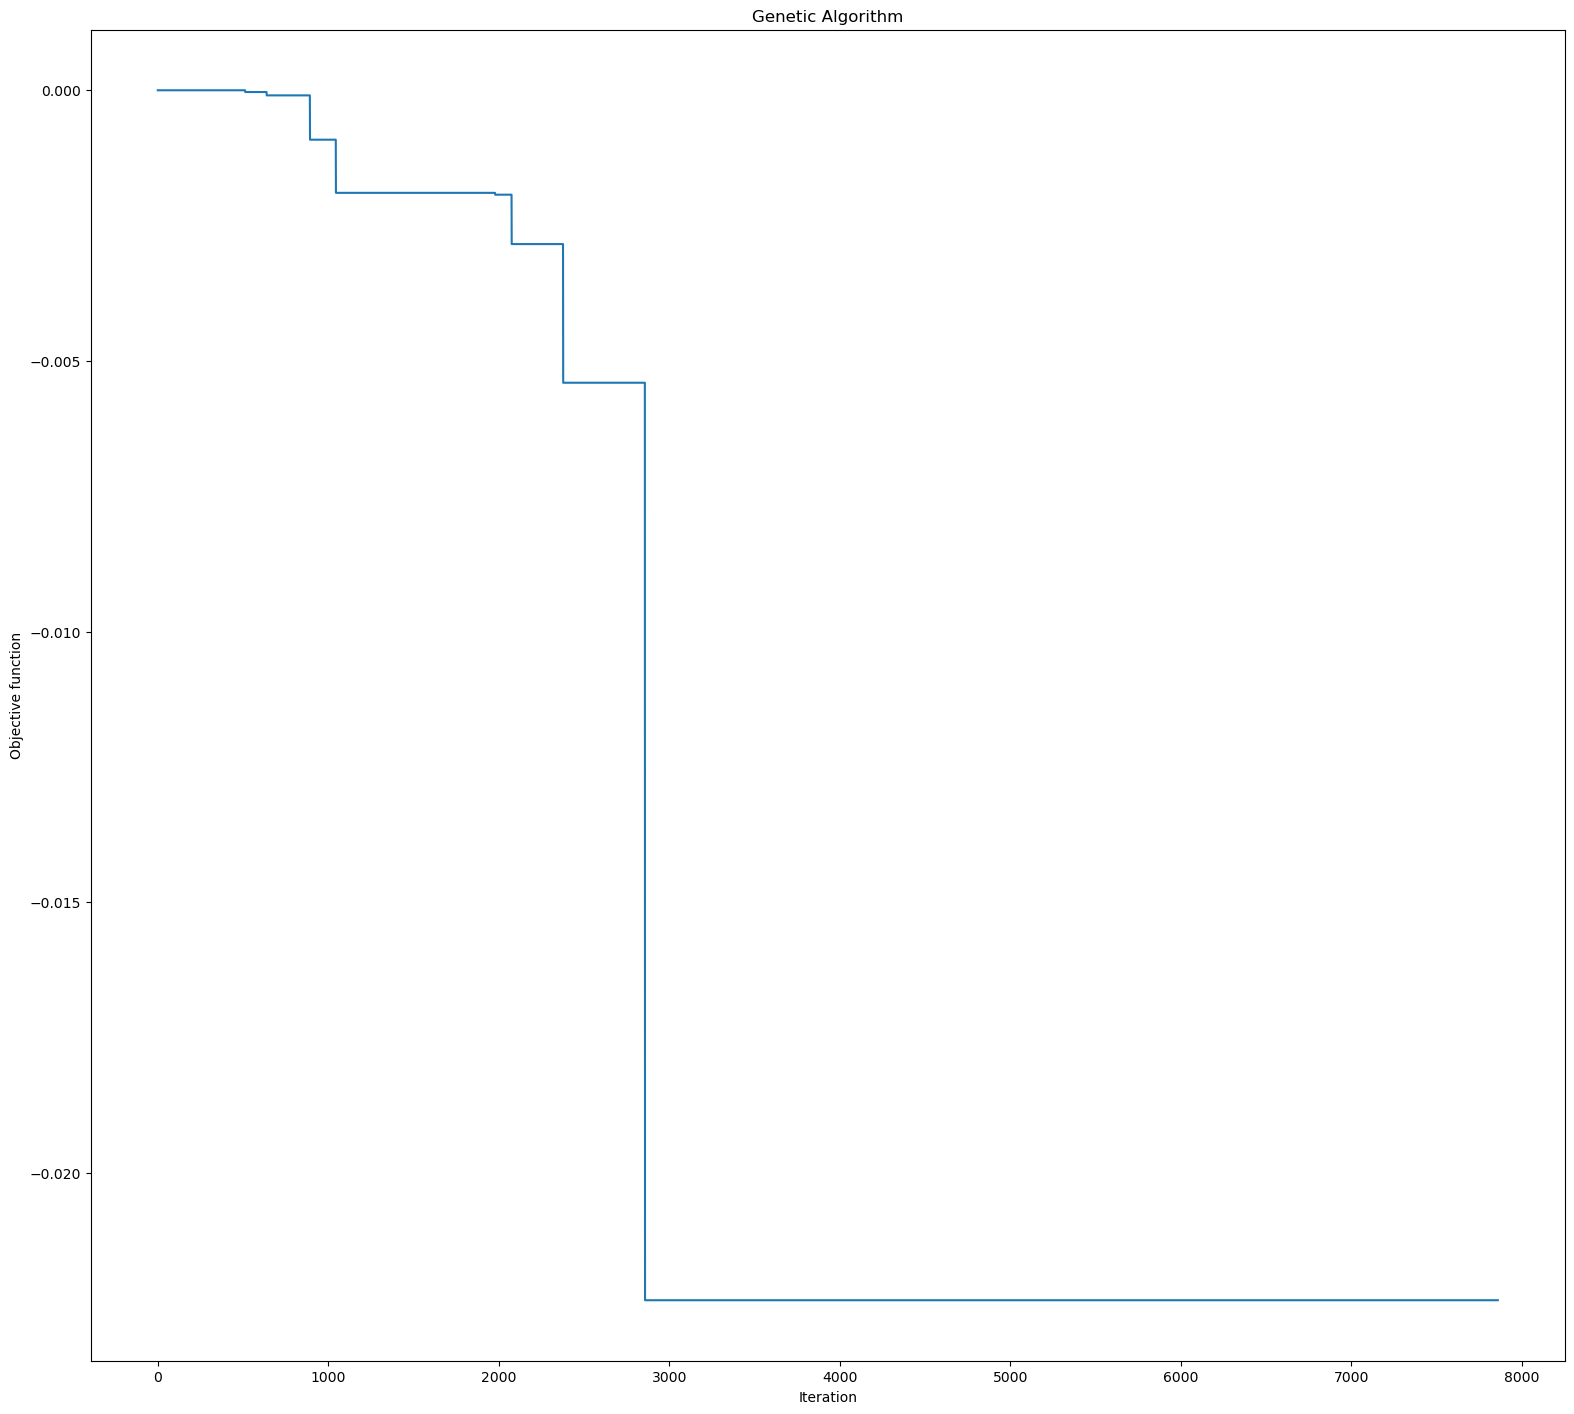


 The best solution found:                                                                           
 [32. 26.  9.  9.]

 Objective function:
 -0.062483454038760114


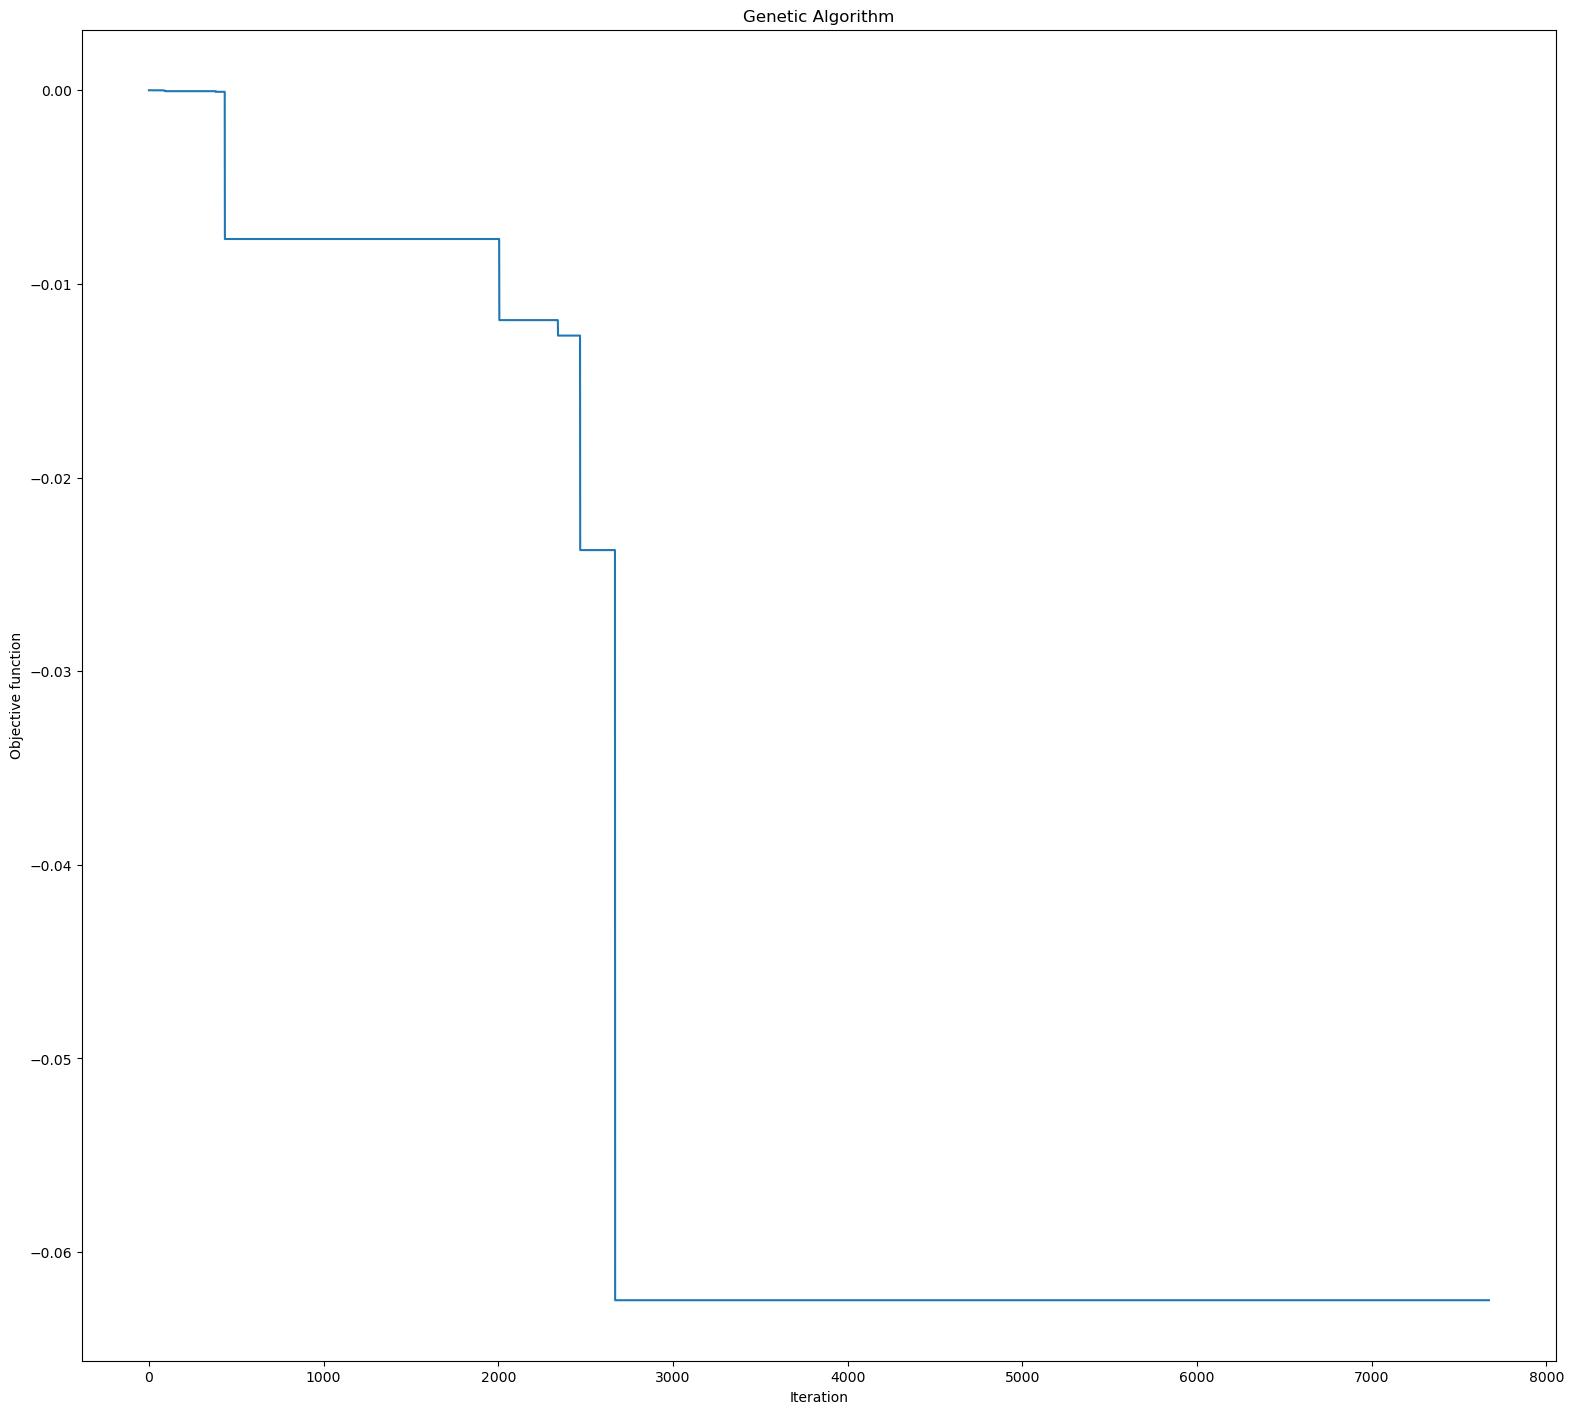

<Figure size 1600x1600 with 0 Axes>

In [20]:
varbounds = []

for d in node_dicts:

    varbounds.append([0,len(d)-1])

for c2 in range(n_classes):

    varbounds[3] = [c2,c2]

    best_path_info, best_solution = get_best_confident_path(rsfg_layers, node_dicts, dls.n_clusters_conv_1, varbounds)

    file_name = 'Source_'+best_path_info['source'][0]+'_target_'+best_path_info['target'][2]

    generate_path_visualisation(output_dir+'/'+file_name, best_path_info, filters_conv_1, filters_conv_2, dls.activations, dls.artifact_clusters)
